In [56]:
import pandas as pd

In [57]:
# Loading the dataset
framingham = pd.read_csv("C:/Users/Damilola/Downloads/new_framingham.csv")
framingham.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days
0,Male,39,post grad,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days
1,Female,46,Secondary Edu,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days
2,Male,48,Primary Edu,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days
3,Female,61,Tertiary Edu,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes,22265 days
4,Female,46,Tertiary Edu,Yes,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,No,16790 days


In [58]:
framingham['education'].value_counts()

education
Primary Edu      1720
Secondary Edu    1253
Tertiary Edu      689
post grad         473
Name: count, dtype: int64

In [59]:
# Check for null values in the data
framingham.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
age_in_days          0
dtype: int64

In [60]:
# check the stats to know what to fill the null values with
framingham.describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4240.000000,4211.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000
mean,49.580189,9.005937,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655
std,8.572942,11.922462,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335
min,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,20.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000
max,70.000000,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


In [61]:
# Filling missing values
fill_framingham = {'education': framingham['education'].mode()[0],
                   'cigsPerDay': framingham ['cigsPerDay'].median(),
                   'BPMeds': framingham ['BPMeds'].mode()[0],
                   'totChol': framingham ['totChol'].mean(),
                   'BMI': framingham ['BMI'].mean(),
                   'heartRate' : framingham ['heartRate'].mean(),
                   'glucose' : framingham ['glucose'].mean()}
                   

In [62]:
framingham.fillna(fill_framingham, inplace = True)

In [63]:
# Re-check missing values
framingham.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
age_in_days        0
dtype: int64

In [64]:
# Replace text values with numerical values
framingham['male'] = framingham.male.map({'Male':1,'Female':0})
framingham['education'] = framingham.education.map({'Primary Edu':1,'Secondary Edu':2, 'Tertiary Edu':3, 'post grad':4})
framingham['BPMeds '] = framingham.BPMeds.map({'No':0,'Yes':1})
framingham['currentSmoker'] = framingham.currentSmoker.map({'No':0,'Yes':1})
framingham['prevalentStroke'] = framingham.prevalentStroke.map({'No':0,'Yes':1})
framingham['prevalentHyp'] = framingham.prevalentHyp.map({'No':0,'Yes':1})
framingham['diabetes'] = framingham.diabetes.map({'No':0,'Yes':1})
framingham['TenYearCHD'] = framingham.TenYearCHD.map({'No':0,'Yes':1})

In [65]:
framingham.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,BPMeds
0,1,39,4,0,0.0,No,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,14235 days,0
1,0,46,2,0,0.0,No,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,16790 days,0
2,1,48,1,1,20.0,No,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,17520 days,0
3,0,61,3,1,30.0,No,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,22265 days,0
4,0,46,3,1,23.0,No,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,16790 days,0


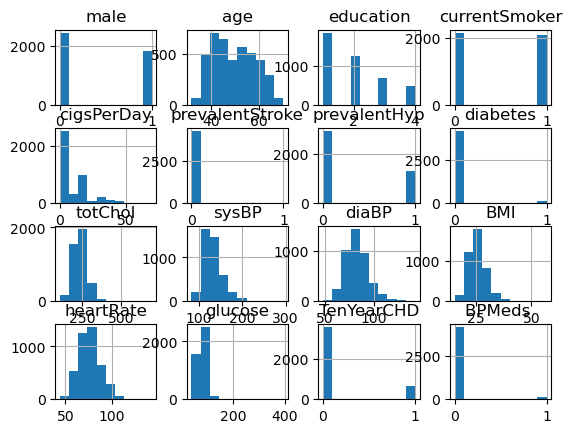

In [66]:
# visualize the distribution of values across each categories
framingham.hist();

In [67]:
# BPMeds column was dropped because a new one has been created 
framingham.drop(columns=['BPMeds'], axis=0, inplace=True)

In [68]:
framingham.head()

,male,age,education,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,BPMeds
0,1,39,4,0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,14235 days,0
1,0,46,2,0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,16790 days,0
2,1,48,1,1,20.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,17520 days,0
3,0,61,3,1,30.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,22265 days,0
4,0,46,3,1,23.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,16790 days,0


In [69]:
# stripping the 'object' column
framingham['days'] = framingham['age_in_days'].str.strip('days')

In [70]:
framingham.head()

,male,age,education,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,BPMeds,days
0,1,39,4,0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,14235 days,0,14235
1,0,46,2,0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,16790 days,0,16790
2,1,48,1,1,20.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,17520 days,0,17520
3,0,61,3,1,30.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,22265 days,0,22265
4,0,46,3,1,23.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,16790 days,0,16790


In [71]:
# datatype casting
framingham['days'] = framingham['days'].astype(int)

In [72]:
framingham['age'] = framingham['days']//365

In [73]:
framingham.head()

,male,age,education,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,BPMeds,days
0,1,39,4,0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,14235 days,0,14235
1,0,46,2,0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,16790 days,0,16790
2,1,48,1,1,20.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,17520 days,0,17520
3,0,61,3,1,30.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,22265 days,0,22265
4,0,46,3,1,23.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,16790 days,0,16790


In [74]:
# dropping duplicate column
framingham.drop(columns=['age_in_days'], axis=0, inplace=True)

In [75]:
framingham.head(3)

,male,age,education,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,BPMeds,days
0,1,39,4,0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,14235
1,0,46,2,0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,16790
2,1,48,1,1,20.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,0,17520


In [76]:
# data pre-processing
X = framingham.drop('TenYearCHD', axis = 1)
y = framingham['TenYearCHD']
X = (X - X.min())/ (X.max() - X.min()) 

In [77]:
# Splitting the dataset into train and test, using 80% of data for training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 30)

## Training the Model using KNN Algorithm ##

In [78]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [79]:
y_pred = model.predict (X_test)

In [80]:
#to check for accuracy
from sklearn.metrics import accuracy_score, classification_report
print (f" Accuracy: {accuracy_score(y_test, y_pred)}")
print (f" Classification report:\n {classification_report(y_test, y_pred)}")

 Accuracy: 0.8466981132075472
 Classification report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.92       740
           1       0.18      0.06      0.08       108

    accuracy                           0.85       848
   macro avg       0.53      0.51      0.50       848
weighted avg       0.79      0.85      0.81       848



In [81]:
# to check for prediction
import numpy as np
sample_data = np.array([X_test.iloc[0]])
sample_pred = model.predict(sample_data)
print(f'Predicted class for the sample data: {sample_pred}')

Predicted class for the sample data: [0]


C:\Users\Damilola\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Visualizing the Predicted and Actual values ##

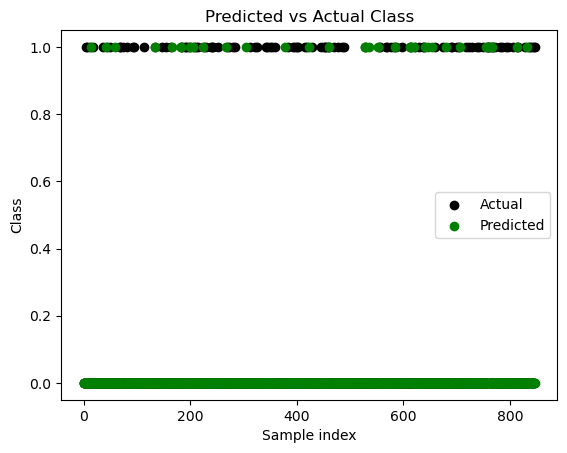

In [82]:
import matplotlib.pyplot as plt
plt.scatter(range(len(y_test)), y_test, color= 'black', label= 'Actual')
plt.scatter(range(len(y_test)), y_pred, color= 'green', label= 'Predicted')
plt.legend()
plt.title('Predicted vs Actual Class')
plt.xlabel('Sample index')
plt.ylabel('Class')
plt.show()